# Ejercicio 6

El circuito de la figura corresponde amplificador de potencia de RF sintonizado, realizado con un MOSFET, para una portadora de $f = 10 MHz$.


![ex 2.13](fig/circuitoClaseC.png)


Para este proyecto se busca máxima excursión de señal para un amplificador de RF Clase B. 

Se asume la impedancia del dispositivo a su salida entre  Drain  y Source es lo suficientemente elevada como para desestimarla frente a la carga.

|Symbol        | Parameter                  | Value     | Unit     |   
|--------------|----------------------------|-----------|----------|
|$V_{(BR)DSS}$ |  Drain source voltage      | $125$     | V        |
|$V_{GS}$      |  Gate source voltage       | $\pm 20$  | V        |
|$I_{D}$       |  Drain current             | $10$      | A        |
|$V_{(min)DS}$ |  Drain source voltage min. | $10$      | V        |

Impedancia de entrada del MOSFET a $f = 10MHz$ 
$$Z_{in}  = (4 -2j) \Omega$$ 

Impedancia de salida del MOSFET   a $f = 10MHz$ 
$$Z_{out} = (80-2j)  \Omega$$ 

![ex 2.13](fig/mosfet_lineal_1.png)


La tensión de excitación en Gate es una señal AM.

$V_{g}= 5 \cdot (1+m \cdot cos(w_{m}. t)) \cdot \cos(w_{o} \cdot t) [V]$ 

$f_{o}= 10 MHz$ 

$f_{m}= 1 KHz$ 

$m= 0.5$

El Q cargado de ambos tanques (Gate y  Drain) es de $Q_C = 10$ y el  $Q_{oL} = Q_{oC} = infinito$ de los elementos reactivos es infinito. 

La tensión de fuente es de $V_{DD} = 50V$. 

Potencia en la carga $P_L = 150 W$. 

$R_{l}' = 5.33 \Omega$ para maxima escursión de la salida (dada la fuente de alimentación).

Determinar:

   1. $V_{GG}$ y $V_{s}$ (tener en cuenta que la señal es AM) 
   2. $V_{gs(portadora)}$, $V_{gs(valle)}$ 
   3. $i_{g}$ ( valor pico de la componente alterna de la excitación).
   4. $I_{do(pico)}$, $I_{d1(pico)}$
   5. $I_{do(portadora)}$, $I_{d1(portadora)}$
   6. $I_{do(valle)}$, $I_{d1(valle)}$
   7. $P_{dc}$.
   8. $P_{o}$. 
   9. $P_{tr}.
   10. Rendimiento
   


![ex 2.13](fig/circuitoClaseC_mosfet_1.png)


############

Calculos !!!
   1. $V_{GG}$ y $V_{s}$ (tener en cuenta que la señal es AM) 
   2. $V_{gs(portadora)}$, $V_{gs(valle)}$ 
   3. $i_{g}$ ( valor pico de la componente alterna de la excitación).
   4. $I_{do(pico)}$, $I_{d1(pico)}$
   5. $I_{do(portadora)}$, $I_{d1(portadora)}$
   6. $I_{do(valle)}$, $I_{d1(valle)}$
   7. $P_{dc}$.
   8. $P_{o}$. 
   9. $P_{tr}.
   10. Rendimiento
   
###########

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

from scipy.fftpack import fft, fftfreq
from time import time



from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 24,
          'figure.figsize': (8, 8),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize':24,
         'ytick.labelsize':24}
plt.rcParams.update(params) 


In [2]:
#Calculos 
#parametros de la senal 
fc   = 10e6 #Hz
th_c    = 2*np.pi/3
m    = 0.5


m   = 0.5      #indice de modulacion
fm  = 0.1e6    #frecuencia de la modulante

#tiempo de un periodo de la modulante
Tm  = 1/fm

#Muestreo
fs  =  24*fc

#delta time para el calculo de los armonicos
ds  = 1/(fs)



#parametros del filtro de entrada y de salida 
Qo = np.inf
Qc = 10

#parametros del transistor
Vds_min = 10  #V
Vds_max = 125 #V
Vgs_max = 7.5 #V
Vth     = 2.5 #V
Zin     =  4-2j #ohms
Zout    = 80-2j #ohms

# Generador
Zg      = 50 #ohms

# Carga
Zl      = 50 #ohms
rlp     = 5.33
VDD     = 50 #V
PL      = 150 #W
### Para los calculos!
#tiempo de un periodo 
Tc  = 1/fc

# muestreo (empleando 24 ya que corresponde a el muestreo del empleado comunmente en el metodo de los trapecios)
ns  =  24       
fs  =  fc*ns
ds  =  1/(fs)

In [3]:
#### 1

Vsp  = (Vgs_max-Vth)/(1-np.cos(th_c/2))
VGG = Vgs_max - Vsp

Vs   = Vsp/(1+m)
print('$Vs  = {:.2f}$'.format(Vs))

print('$VGG = {:.2f}$'.format(VGG))

$Vs  = 6.67$
$VGG = -2.50$


In [4]:
#### 2. $V_{gs(portadora)}$, $V_{gs(valle)}$ 

print('$v_gs(pico) = {:.2f} + {:.2f} cos(\\theta)$'.format(VGG,Vs*(1+m)))


print('$v_gs(portadora) = {:.2f} + {:.2f} cos(\\theta)$'.format(VGG,Vs))


print('$v_gs(valle) = {:.2f} + {:.2f} cos(\\theta)$'.format(VGG,Vs*(1-m)))

$v_gs(pico) = -2.50 + 10.00 cos(\theta)$
$v_gs(portadora) = -2.50 + 6.67 cos(\theta)$
$v_gs(valle) = -2.50 + 3.33 cos(\theta)$


In [5]:
#### 3. $i_{g}$ ( valor pico de la componente alterna de la excitación).

Yin = 1/Zin
Pinp = Vs**2*Yin.real/(4)

print('$P_inp = {:.2f} W$'.format(Pinp))

ig  = (Pinp*4/(Zg.real/2))**0.5

print('$igp = {:.2f} A$'.format(ig))

Pin = Pinp/(1+m)**2
print('$P_in = {:.2f} W$'.format(Pin))


$P_inp = 2.22 W$
$igp = 0.60 A$
$P_in = 0.99 W$


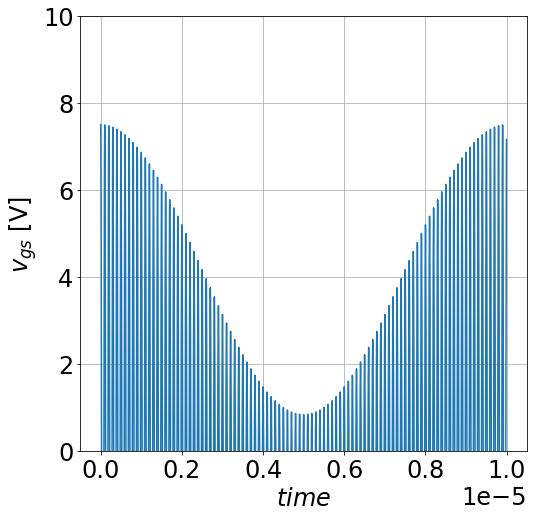

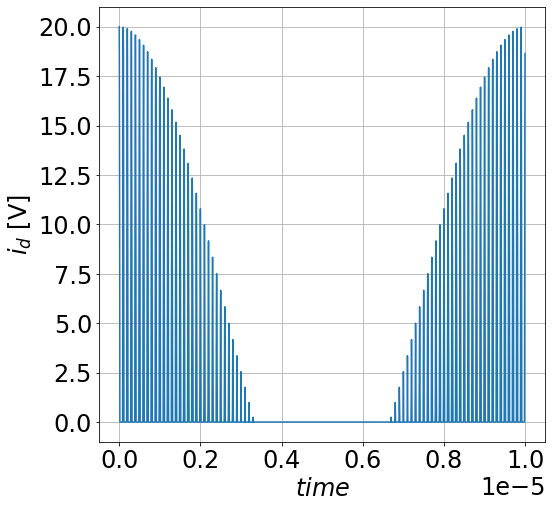

In [6]:
#### 4. $I_{do(pico)}$, $I_{d1(pico)}$

def vgsi(VGG,Vs,m,time):
    return VGG+Vs*(1+m*np.cos(2*np.pi*fm*time))*np.cos(2*np.pi*fc*time)


def idi(v):
    i =  0.             if (v < 2.5) else 0
    i = (20/5)*(v-2.5) if (v >= 2.5  and v < 7.5) else i
    i = (20) if (v >= 7.5  ) else i
    return i


time = np.arange(0,Tm,ds)

vgs = vgsi(VGG,Vs,m,time)

idd = np.array([idi(v) for v in vgs])


plt.plot(time, vgs)
plt.ylim(0,10)
plt.ylabel('$v_{gs}$ [V]')
plt.xlabel('${time}$')

plt.grid()
plt.show()


plt.plot(time, idd)
plt.ylabel('$i_{d}$ [V]')
plt.xlabel('${time}$')

plt.grid()
plt.show()


<ipython-input-8-b92980c2adf7>:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(frq, np.abs(Fam) )


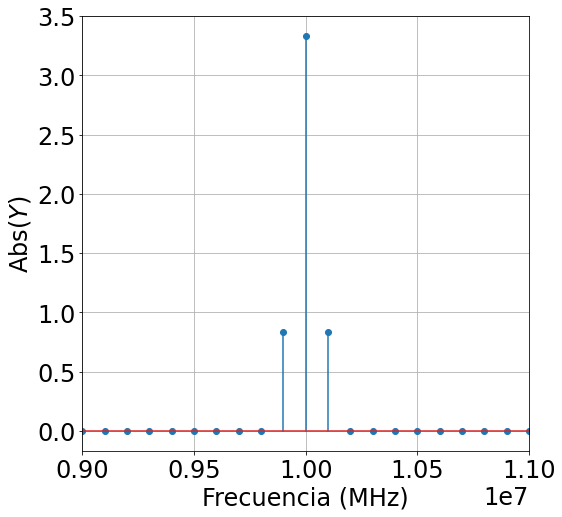

In [8]:
# FFT

Fam = fft(vgs) / len(vgs)  # Normalizada

frq = fftfreq(len(vgs), ds)  # Recuperamos las frecuencias

plt.stem(frq, np.abs(Fam) )  

plt.xlim(9e6, 11e6)
plt.xlabel('Frecuencia (MHz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()

<ipython-input-9-68612b4e255d>:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(frq, np.abs(Fam)*2 )


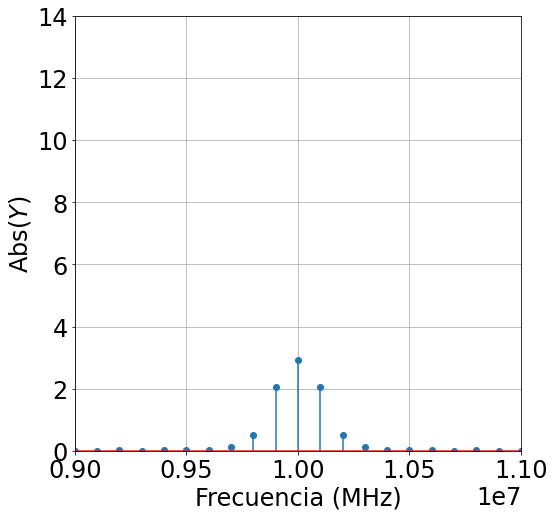

In [9]:
# FFT

Fam = fft(idd) / len(idd)  # Normalizada

frq = fftfreq(len(idd), ds)  # Recuperamos las frecuencias

plt.stem(frq, np.abs(Fam)*2 )  

plt.xlim(9e6, 11e6)
plt.ylim(0, 4)
plt.xlabel('Frecuencia (MHz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()

<ipython-input-12-d767080d46e0>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(frq, np.abs(Fam)*2 )


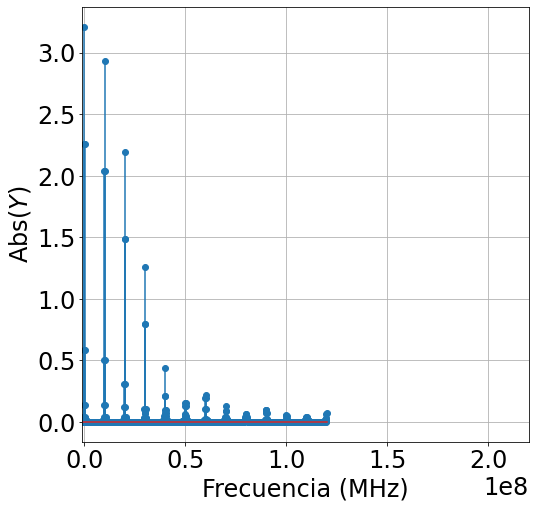

In [12]:
plt.stem(frq, np.abs(Fam)*2 )  
plt.xlim(-1e6, 220e6)
plt.xlabel('Frecuencia (MHz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()